<a href="https://colab.research.google.com/github/ICam99/icd2024/blob/main/practices/Practica4_IgnacioC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Práctica 4. Tarea de clasificación**

Importamos algunas de las librerías que utilizaremos en esta práctica.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Importamos el modulo de drive para poder cargar el dataset (por el tamaño que maneja).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/ICD/Practica4/train_airlines_delay_challenge.csv'
df = pd.read_csv(path)

Comenzamos el **análisis exploratorio** del dataset.

In [4]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB


Checamos si alguna de las columnas cuenta con valores en nulo, para tomarlo en cuenta para la limpieza de datos.

In [6]:
df.isnull().sum()

,0
FL_DATE,0
OP_CARRIER,0
OP_CARRIER_FL_NUM,0
ORIGIN,0
DEST,0
CRS_DEP_TIME,0
DEP_TIME,0
DEP_DELAY,0
TAXI_OUT,0
WHEELS_OFF,0


Ahora veremos datos sobre los atributos numéricos del dataset.

In [7]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
count,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06
mean,2.245577e+03,1.326138e+03,1.332794e+03,8.889274e+00,1.581331e+01,1.355605e+03,1.495601e+03,4.658041e+00,1.368754e+02,7.889871e+02
std,1.877307e+03,4.730146e+02,4.856179e+02,3.604610e+01,9.185871e+00,4.869539e+02,4.932537e+02,3.852880e+01,7.355825e+01,5.947835e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,1.000000e+00,1.000000e+00,1.000000e+00,-2.380000e+02,1.800000e+01,3.100000e+01
25%,6.970000e+02,9.230000e+02,9.250000e+02,-5.000000e+00,1.000000e+01,9.390000e+02,1.115000e+03,-1.300000e+01,8.400000e+01,3.540000e+02
50%,1.684000e+03,1.320000e+03,1.327000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.520000e+03,-4.000000e+00,1.180000e+02,6.220000e+02
75%,3.467000e+03,1.725000e+03,1.733000e+03,7.000000e+00,1.800000e+01,1.747000e+03,1.911000e+03,8.000000e+00,1.680000e+02,1.020000e+03
max,9.320000e+03,2.359000e+03,2.400000e+03,1.805000e+03,2.970000e+02,2.400000e+03,2.400000e+03,1.795000e+03,7.180000e+02,4.983000e+03


Revisamos ahora si existen datos duplicados en nuestro dataset.

In [8]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicate_rows))

Number of duplicated rows: 27522




---

Comenzamos ahora con **limpieza de datos**.

Empezamos haciendo *drop* a algunas columnas que consideré que no serían necesarias para el entrenamiento.

In [9]:
df = df.drop(['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST'], axis=1)

In [10]:
df.head()

,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,AA,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,XE,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,OH,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,OO,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,WN,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


Acto seguido, nos desharemos de los datos duplicados en nuestro dataset.

In [11]:
df = df.drop_duplicates()

Haremos un poco más de exploración en el dataset, para revisar cuales de los datos son factibles utilizar para el entrenamiento y cuales podrían necesitar modificarse o descartarse.
Comenzamos revisando el número de aerolíneas diferentes presentes en el dataset (si son pocas nos podría ser util para tratar de encontrar una relación entre aerolíneas y retrasos).

In [12]:
unique_op_carrier_count = df['OP_CARRIER'].nunique()
print(f"Number of unique values in OP_CARRIER: {unique_op_carrier_count}")

Number of unique values in OP_CARRIER: 21


Vemos que hay 21 aerolíneas diferentes en la columna. Las transformamos en datos numéricos para poder analizarla en un mapa de correlación.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['OP_CARRIER'] = label_encoder.fit_transform(df['OP_CARRIER'])

df.head()

,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,1,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,19,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,13,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,14,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,18,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


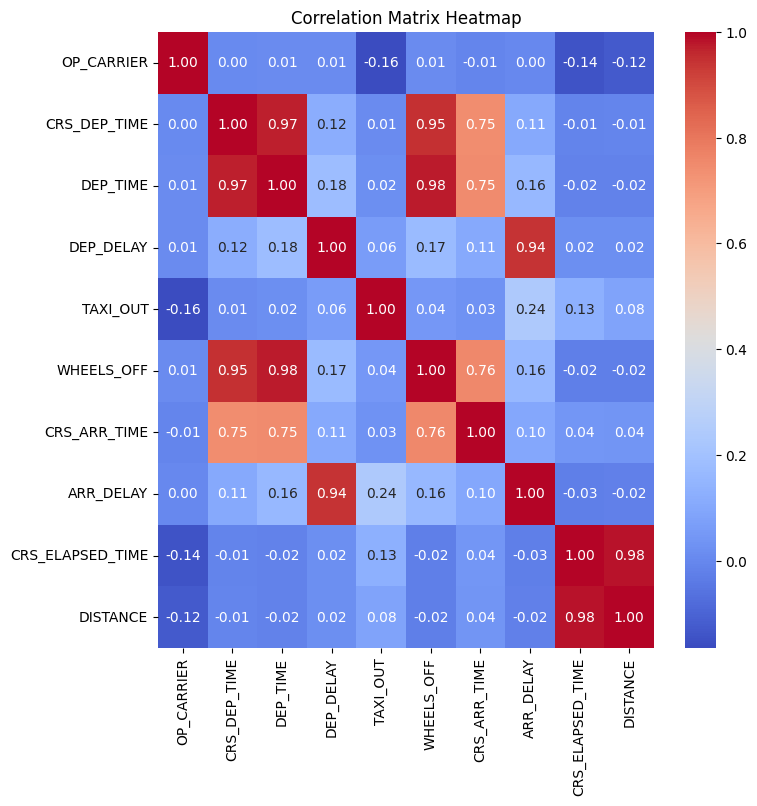

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Pasamos ahora a hacer los cambios necesarios a la columna ***ARR_DELAY***. Para poder utilizarla en nuestros modelos de entrenamiento, dado que la mayoría utilizan datos numéricos, se codificará como tal:


*   **1**, para 'Early', cuando su tiempo de llegada sea menor al esperado.
*   **2**, para 'On time', cuando haya llegado entre su hora esperada y hasta 15 minutos tarde.
*   **3**, para 'Delay', cuando esté atrasado por más de 15 minutos.



In [15]:
# Definimos una función para categorizarlos según nuestra descripción.
def categorize_delay(delay):
    if delay < 0:
        return '1'
    elif 0 <= delay < 15:
        return '2'
    else:
        return '3'

# Aplicamos ahora la función a nuestra columna.
df['ARR_DELAY'] = df['ARR_DELAY'].apply(categorize_delay)

# Mostramos el dataframe para verificar los cambios.
df.head()

,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,1,1055.0,1139.0,44.0,15.0,1154.0,1405.0,3,190.0,1258.0
1,19,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,1,124.0,667.0
2,13,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,2,108.0,505.0
3,14,820.0,814.0,-6.0,15.0,829.0,905.0,1,45.0,89.0
4,18,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,1,180.0,1140.0


Como parte de la **extracción de características**, crearemos una nueva columna a la que llamaremos ***DEP_DELAY_Value***. Sobre esta columna también aplicaremos la función generada para los valores de ***ARR_DELAY***. Esto por que sabemos que existe gran correlación entre ***DEP_DELAY*** y ***ARR_DELAY*** por defecto, así que tal vez con el nuevo ***ARR_DELAY*** procesado, tenga una correlación con esta nueva columna.

In [16]:
df['DEP_DELAY_Value'] = df['DEP_DELAY'].apply(categorize_delay)
df.head()

,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,DEP_DELAY_Value
0,1,1055.0,1139.0,44.0,15.0,1154.0,1405.0,3,190.0,1258.0,3
1,19,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,1,124.0,667.0,1
2,13,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,2,108.0,505.0,1
3,14,820.0,814.0,-6.0,15.0,829.0,905.0,1,45.0,89.0,1
4,18,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,1,180.0,1140.0,1


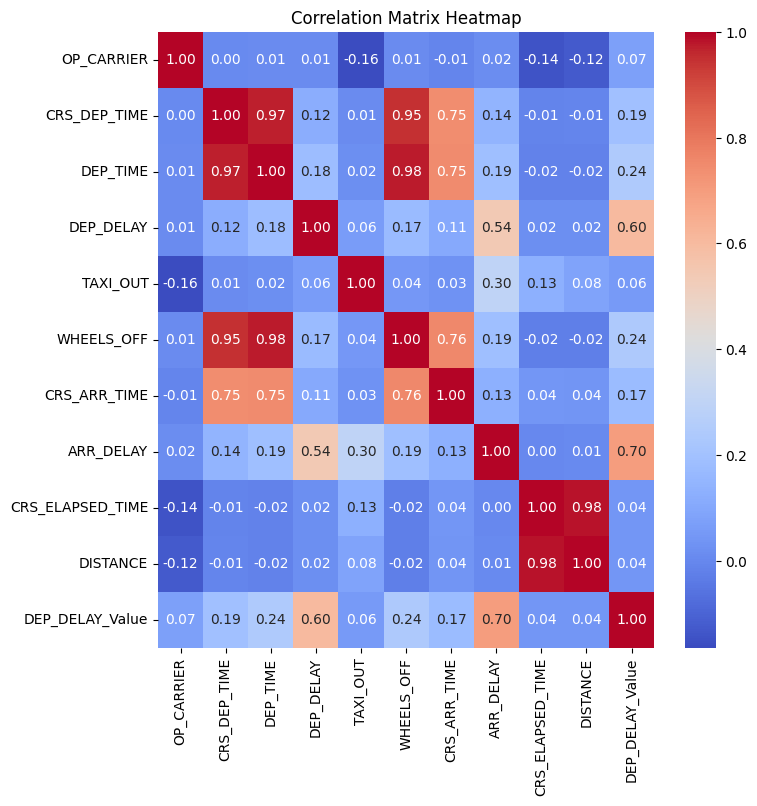

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Vemos que esta nueva columna generada tiene alta correlación, por lo que nuestra intuición era correcta. Ahora generamos una columna adicional, también con la finalidad de ver si encontramos una correlación. Esta columna la llamaremos ***speed***. Y será relativo a la distancia viajada y el tiempo de viaje.

In [18]:
df['speed'] = df['DISTANCE'] / df['CRS_ELAPSED_TIME']

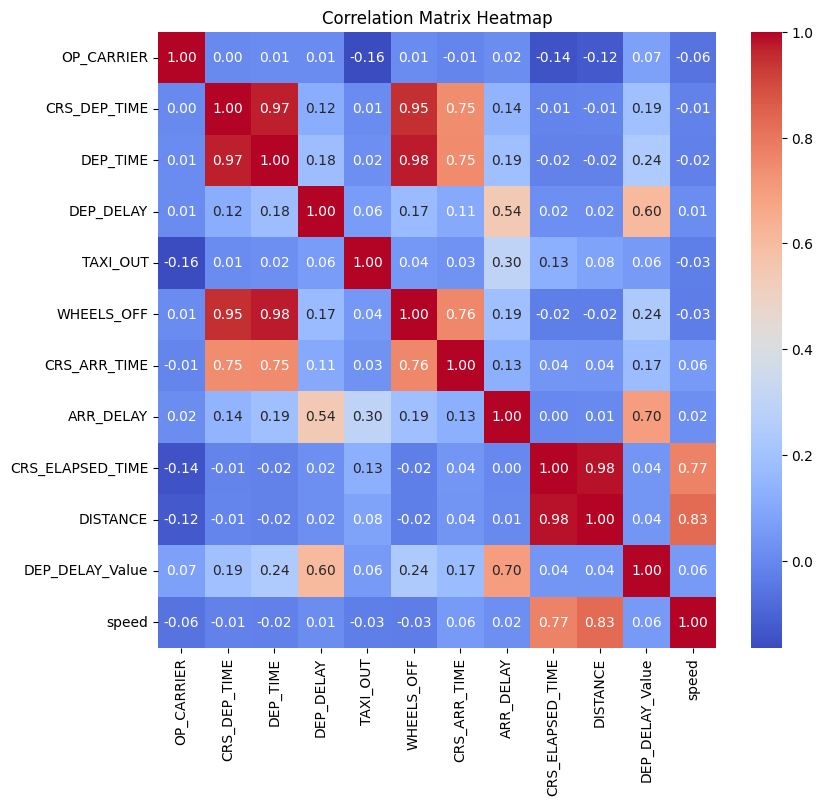

In [19]:
plt.figure(figsize=(9, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Vemos que en realidad esta columna no añade correlación a la predicción que queremos hacer. Aún así podría ser util, por lo que la dejaremos. Sin embargo, haremos *drop* a la columna ***OP_CARRIER***, puesto que siento que no nos será util por su baja correlación con el resto de los datos.

In [20]:
df = df.drop(['OP_CARRIER'], axis=1)

Seguimos con nuestro análisis general de los datos antes de pasar a los entrenamientos. Haremos un *countplot* para ver cual es la distribución del dataset en cuanto a tiempos de llegada. Tomemos en cuenta que 1 es 'Early', 2 es 'On time' y 3 es 'Delay'.

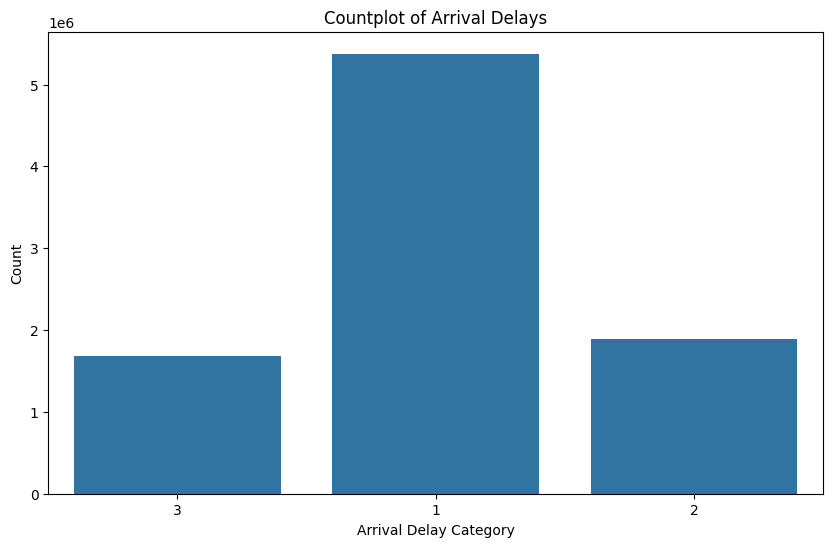

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ARR_DELAY', data=df)
plt.title('Countplot of Arrival Delays')
plt.xlabel('Arrival Delay Category')
plt.ylabel('Count')
plt.show()

In [22]:

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# Separate features (X) and target variable (y)
# X = df.drop('ARR_DELAY', axis=1)
# y = df['ARR_DELAY']

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
# pca = PCA(n_components=3)  # You can adjust the number of components
# X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA results
# df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# df_pca['ARR_DELAY'] = y

# Now you can visualize or further analyze df_pca
# print(df_pca.head())

# Example visualization using a scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='ARR_DELAY', data=df_pca)
# plt.title('PCA of Airline Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

##por motivos de poder computacional y tiempo no se fue posible realizar analisis de componentes principales y reduccion de datos



---
Comenzamos entonces con el entrenamiento de los modelos. Empezando con


### Decision Tree

Accuracy: 0.7186058202535888
F1 Score (macro): 0.6658284429594795
              precision    recall  f1-score   support

           1       0.82      0.80      0.81     53790
           2       0.41      0.43      0.42     18741
           3       0.76      0.77      0.77     16984

    accuracy                           0.72     89515
   macro avg       0.66      0.67      0.67     89515
weighted avg       0.72      0.72      0.72     89515



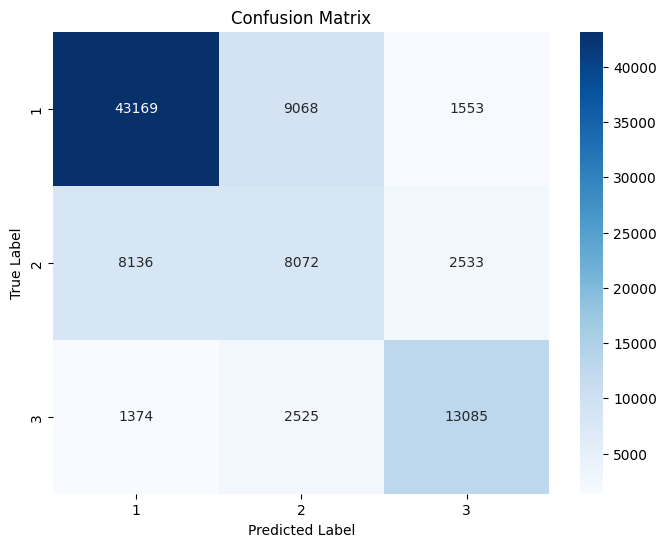

In [23]:
X = df.drop('ARR_DELAY', axis=1)
y = df['ARR_DELAY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, train_size=0.05, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import f1_score
# Evaluate the model using F1-score (macro average)
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1_macro}")

print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Naive Bayes

Accuracy (Gaussian Naive Bayes): 0.7679383343573702
F1 Score (macro, Gaussian Naive Bayes): 0.69784416572088
              precision    recall  f1-score   support

           1       0.82      0.90      0.86     53790
           2       0.49      0.39      0.43     18741
           3       0.84      0.77      0.80     16984

    accuracy                           0.77     89515
   macro avg       0.71      0.69      0.70     89515
weighted avg       0.75      0.77      0.76     89515



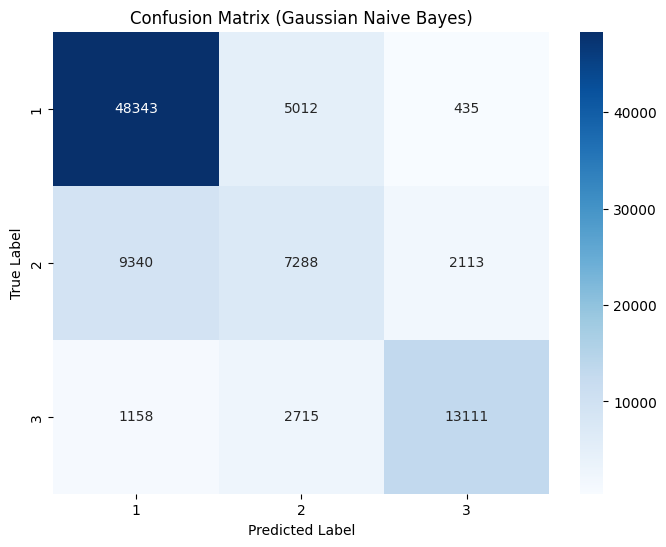

In [24]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_classifier.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (Gaussian Naive Bayes): {accuracy_gnb}")

# Evaluate the model using F1-score (macro average)
f1_macro_gnb = f1_score(y_test, y_pred_gnb, average='macro')
print(f"F1 Score (macro, Gaussian Naive Bayes): {f1_macro_gnb}")

print(classification_report(y_test, y_pred_gnb))

# Plot the confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (Gaussian Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### KNN

Accuracy (KNN): 0.7573032452661566
F1 Score (macro, KNN): 0.6679422709798791
              precision    recall  f1-score   support

           1       0.78      0.94      0.85     53790
           2       0.49      0.30      0.37     18741
           3       0.90      0.69      0.78     16984

    accuracy                           0.76     89515
   macro avg       0.72      0.64      0.67     89515
weighted avg       0.74      0.76      0.74     89515



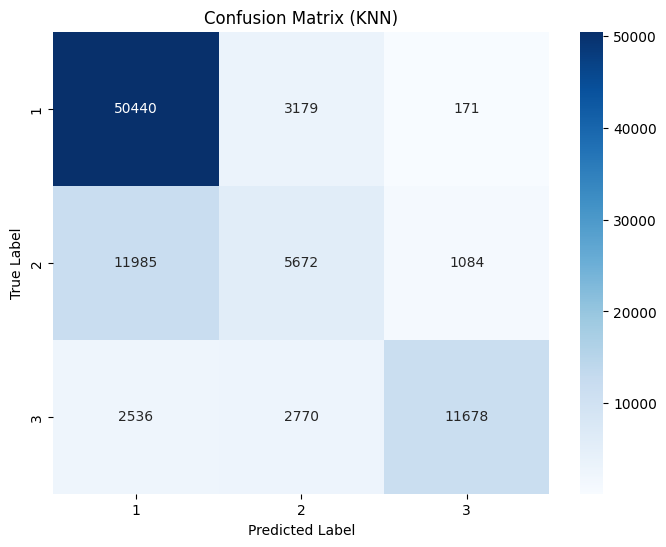

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn5 = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn5}")

# Evaluate the model using F1-score (macro average)
f1_macro_knn5 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score (macro, KNN): {f1_macro_knn5}")

print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy (KNN): 0.7472825783388259
F1 Score (macro, KNN): 0.6646359581164824
              precision    recall  f1-score   support

           1       0.78      0.91      0.84     53790
           2       0.46      0.32      0.37     18741
           3       0.87      0.70      0.78     16984

    accuracy                           0.75     89515
   macro avg       0.70      0.64      0.66     89515
weighted avg       0.73      0.75      0.73     89515



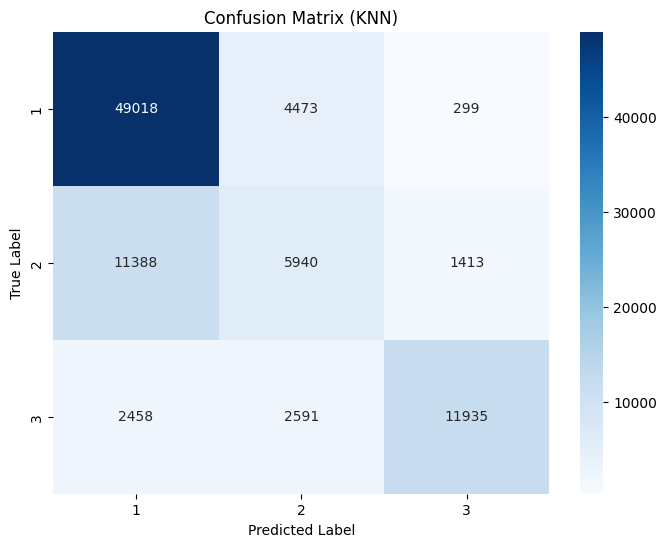

In [26]:
# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn3 = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn3}")

# Evaluate the model using F1-score (macro average)
f1_macro_knn3 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score (macro, KNN): {f1_macro_knn3}")

print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy (KNN): 0.7598391331061833
F1 Score (macro, KNN): 0.6623900418708484
              precision    recall  f1-score   support

           1       0.77      0.95      0.85     53790
           2       0.50      0.28      0.36     18741
           3       0.90      0.69      0.78     16984

    accuracy                           0.76     89515
   macro avg       0.72      0.64      0.66     89515
weighted avg       0.74      0.76      0.73     89515



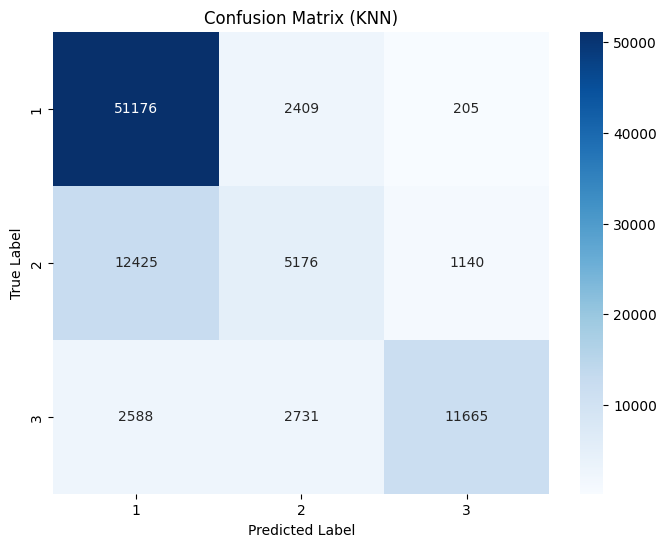

In [27]:
# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn7 = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn7}")

# Evaluate the model using F1-score (macro average)
f1_macro_knn7 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score (macro, KNN): {f1_macro_knn7}")

print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy (KNN): 0.7538624811484109
F1 Score (macro, KNN): 0.6337535709367569
              precision    recall  f1-score   support

           1       0.75      0.98      0.85     53790
           2       0.51      0.20      0.29     18741
           3       0.91      0.66      0.77     16984

    accuracy                           0.75     89515
   macro avg       0.72      0.61      0.63     89515
weighted avg       0.73      0.75      0.72     89515



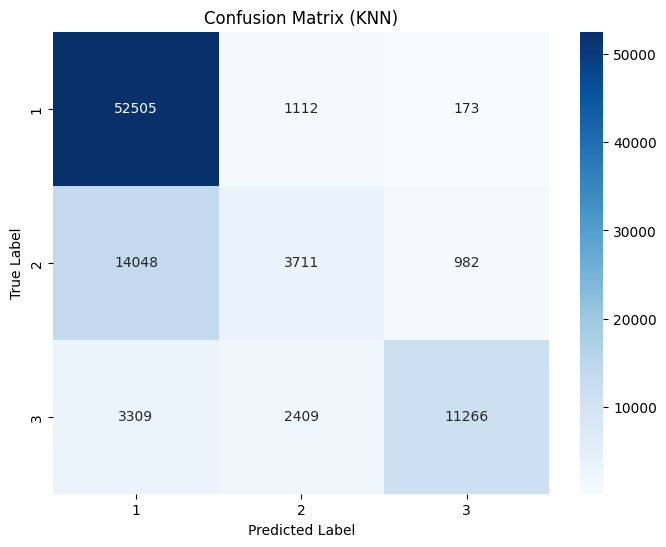

In [28]:
# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=17) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn17 = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn17}")

# Evaluate the model using F1-score (macro average)
f1_macro_knn17 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score (macro, KNN): {f1_macro_knn17}")

print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy (KNN): 0.7142713511701949
F1 Score (macro, KNN): 0.651091688030891
              precision    recall  f1-score   support

           1       0.80      0.83      0.81     53790
           2       0.39      0.38      0.39     18741
           3       0.78      0.72      0.75     16984

    accuracy                           0.71     89515
   macro avg       0.66      0.64      0.65     89515
weighted avg       0.71      0.71      0.71     89515



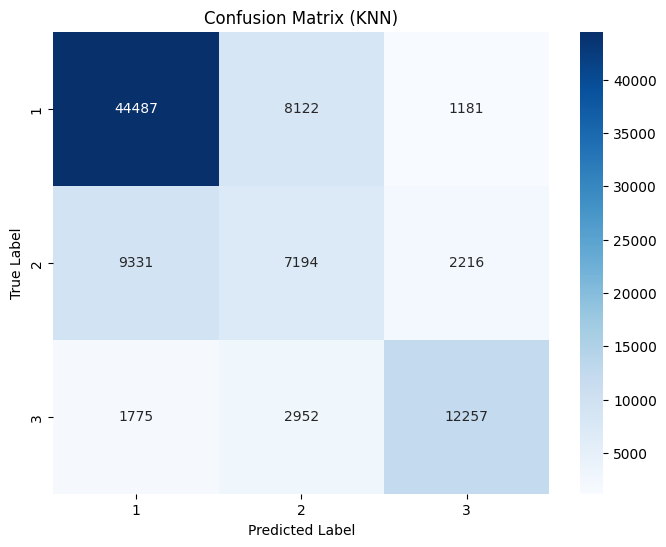

In [29]:
# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn1 = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn1}")

# Evaluate the model using F1-score (macro average)
f1_macro_knn1 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score (macro, KNN): {f1_macro_knn1}")

print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Para KNN, se utilizaron 5 valores diferentes de K, los cuales fueron 1, 3, 5, 7 y 17. Se hace la observación de que el valor óptimo de K parece estar entre 3 y 7. Se incluyen los valores de 1 y 17 como extremos donde baja el rendimiento.

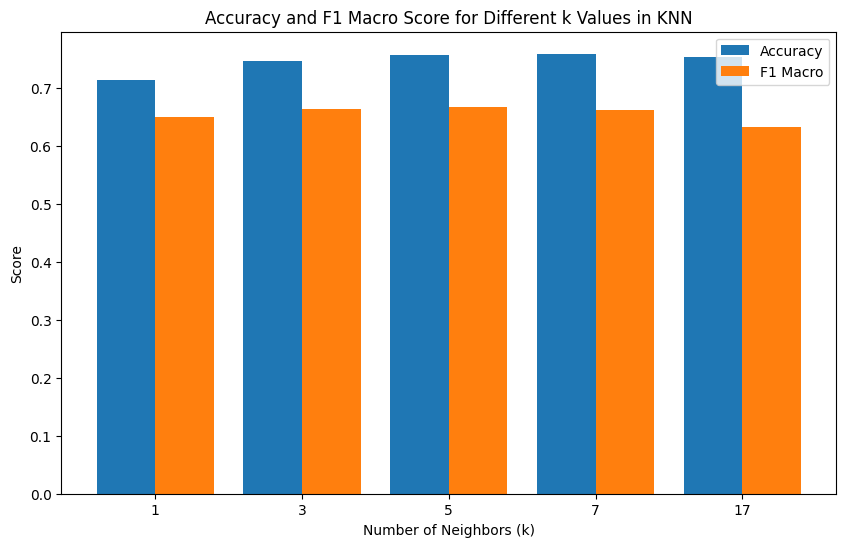

In [30]:
k_values = [1, 3, 5, 7, 17]
accuracy_scores = [accuracy_knn1, accuracy_knn3, accuracy_knn5, accuracy_knn7, accuracy_knn17]
f1_macro_scores = [f1_macro_knn1, f1_macro_knn3, f1_macro_knn5, f1_macro_knn7, f1_macro_knn17]

# Create the bar graph
X_axis = np.arange(len(k_values))
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

plt.bar(X_axis - 0.2, accuracy_scores, 0.4, label='Accuracy')
plt.bar(X_axis + 0.2, f1_macro_scores, 0.4, label='F1 Macro')

plt.xticks(X_axis, k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Accuracy and F1 Macro Score for Different k Values in KNN")
plt.legend()
plt.show()

### Random Forest

Accuracy (Random Forest): 0.7908395241021058
F1 Score (macro, Random Forest): 0.7237072175719869
              precision    recall  f1-score   support

           1       0.82      0.93      0.87     53790
           2       0.56      0.41      0.48     18741
           3       0.88      0.78      0.83     16984

    accuracy                           0.79     89515
   macro avg       0.75      0.71      0.72     89515
weighted avg       0.78      0.79      0.78     89515



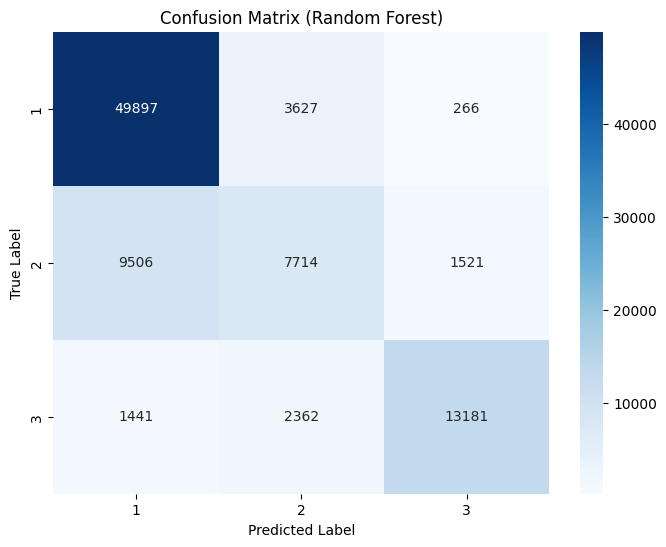

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

# Evaluate the model using F1-score (macro average)
f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f"F1 Score (macro, Random Forest): {f1_macro_rf}")

print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Ridge

Accuracy (Ridge Classifier): 0.7530469753672568
F1 Score (macro, Ridge Classifier): 0.5535215824057849
              precision    recall  f1-score   support

           1       0.75      0.99      0.85     53790
           2       0.45      0.00      0.01     18741
           3       0.76      0.84      0.80     16984

    accuracy                           0.75     89515
   macro avg       0.65      0.61      0.55     89515
weighted avg       0.69      0.75      0.67     89515



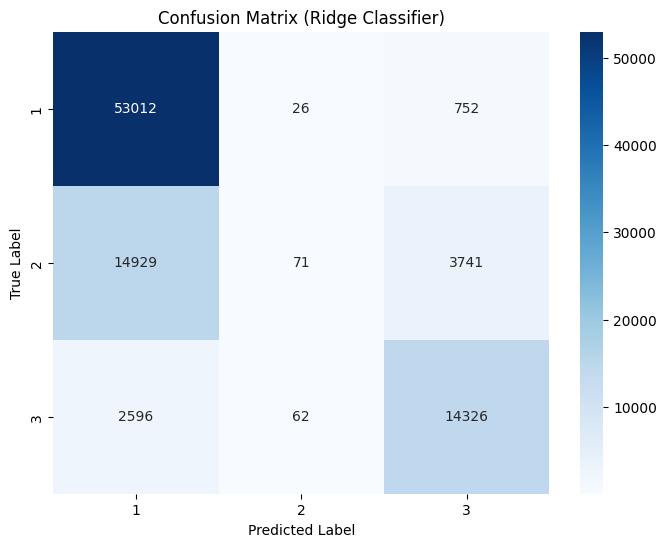

In [32]:
from sklearn.linear_model import RidgeClassifier

# Initialize and train the Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=1.0)  # You can adjust the alpha parameter
ridge_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_classifier.predict(X_test)

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy (Ridge Classifier): {accuracy_ridge}")

# Evaluate the model using F1-score (macro average)
f1_macro_ridge = f1_score(y_test, y_pred_ridge, average='macro')
print(f"F1 Score (macro, Ridge Classifier): {f1_macro_ridge}")

print(classification_report(y_test, y_pred_ridge))

# Plot the confusion matrix
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ridge, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (Ridge Classifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Bagging

Accuracy (Bagging): 0.7892643691001509
F1 Score (macro, Bagging): 0.7234777270892926
              precision    recall  f1-score   support

           1       0.82      0.92      0.87     53790
           2       0.56      0.42      0.48     18741
           3       0.88      0.77      0.82     16984

    accuracy                           0.79     89515
   macro avg       0.75      0.71      0.72     89515
weighted avg       0.78      0.79      0.78     89515



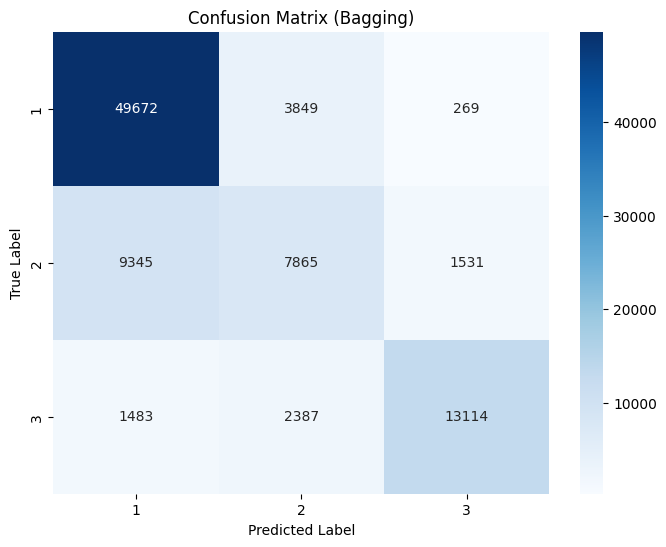

In [33]:

from sklearn.ensemble import BaggingClassifier

# Initialize the Bagging Classifier with a Decision Tree base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy (Bagging): {accuracy_bagging}")

f1_macro_bagging = f1_score(y_test, y_pred_bagging, average='macro')
print(f"F1 Score (macro, Bagging): {f1_macro_bagging}")

print(classification_report(y_test, y_pred_bagging))

# Plot the confusion matrix
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (Bagging)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (AdaBoost): 0.7916438585711892
F1 Score (macro, AdaBoost): 0.7127373574424288
              precision    recall  f1-score   support

           1       0.81      0.95      0.88     53790
           2       0.58      0.37      0.45     18741
           3       0.87      0.76      0.81     16984

    accuracy                           0.79     89515
   macro avg       0.75      0.69      0.71     89515
weighted avg       0.78      0.79      0.77     89515



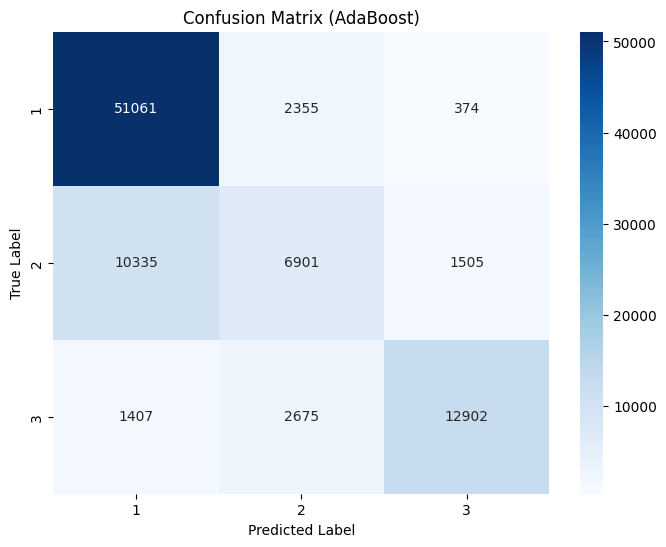

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42) # You can adjust hyperparameters
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy (AdaBoost): {accuracy_ada}")

# Evaluate the model using F1-score (macro average)
f1_macro_ada = f1_score(y_test, y_pred_ada, average='macro')
print(f"F1 Score (macro, AdaBoost): {f1_macro_ada}")

print(classification_report(y_test, y_pred_ada))

# Plot the confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Regresión Linear

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R-squared (Linear Regression): {r2}")

Mean Squared Error (Linear Regression): 0.2568874738853917
R-squared (Linear Regression): 0.5867163002315361


### Lasso

In [45]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Classifier
lasso_classifier = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_classifier.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (Lasso): {mse_lasso}")

Mean Squared Error (Lasso): 0.2813474720434424


### Support Vector Machine

Accuracy (SVM): 0.7890625
F1 Score (macro, SVM): 0.7270723324931406
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       511
           1       0.62      0.46      0.53       197
           2       0.89      0.70      0.78       188

    accuracy                           0.79       896
   macro avg       0.77      0.70      0.73       896
weighted avg       0.78      0.79      0.78       896



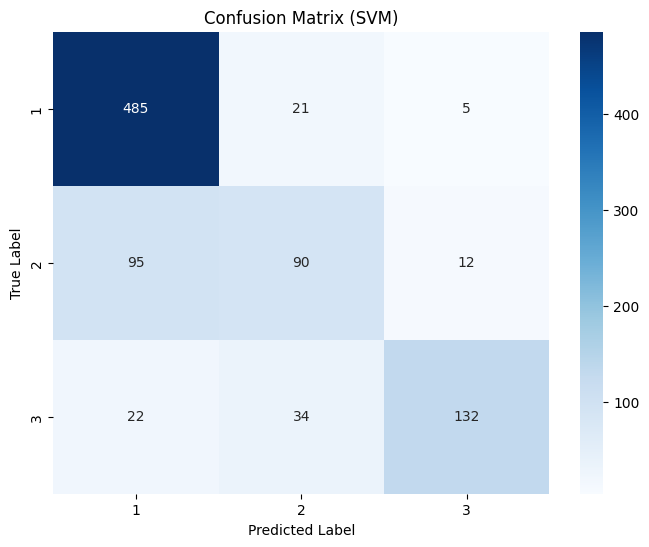

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, train_size=0.0005, random_state=42)

# prompt: svm classifier trying to predict arr_dealy

from sklearn.svm import SVC

# Initialize and train the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42) # You can adjust kernel and C
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")

# Evaluate the model using F1-score (macro average)
f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score (macro, SVM): {f1_macro_svm}")

print(classification_report(y_test, y_pred_svm))

# Plot the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



---

Ahora pasaremos finalmente a la predicción con el dataset de prueba. Se escoge como modelo al RandomForest ya que fue el quetuvo un mejor desempeño en entrenamiento, con 0.72 de f1 macro score. Otros que se consideraron fueron bagging y SVM, sin embargo se escogió Random Forest por su tiempo de ejecución mucho menor.

Igualmente cargamos el dataset desde Drive.

In [51]:
drive.mount('/content/drive')

path = '/content/drive/My Drive/ICD/Practica4/test_airlines_delay_challenge.csv'
df_test = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df_test

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE
0,2018-07-13,B6,574,TPA,EWR,929,924.0,-5.0,13.0,937.0,1215,166.0,997.0
1,2018-09-11,UA,256,DEN,SFO,750,750.0,0.0,18.0,808.0,928,158.0,967.0
2,2018-07-22,WN,3252,AUS,PHX,1710,1820.0,70.0,8.0,1828.0,1730,140.0,872.0
3,2018-04-30,AA,1422,BOS,JFK,1440,1431.0,-9.0,17.0,1448.0,1607,87.0,187.0
4,2018-05-09,WN,187,HOU,ATL,710,709.0,-1.0,11.0,720.0,1010,120.0,696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249995,2018-02-02,WN,201,HOU,CRP,830,828.0,-2.0,12.0,840.0,925,55.0,187.0
2249996,2018-02-05,UA,508,EWR,IAH,640,637.0,-3.0,15.0,652.0,944,244.0,1400.0
2249997,2018-11-29,OH,5378,LGA,CMH,1411,1408.0,-3.0,13.0,1421.0,1612,121.0,479.0
2249998,2018-03-15,OH,5652,DCA,HPN,1329,1331.0,2.0,16.0,1347.0,1442,73.0,234.0


Hacemos preprocesamiento de los datos de prueba, adicionalmente se crea la columna ***ARR_DELAY*** con los datos siendo llenados por defecto con la frase 'On time'. Nuestra predicción entonces será procesada de manera discreta y no numérica.

In [63]:

# SE PREPROCESAN LOS DATOS PARA QUE COINCIDAN LAS COLUMNAS CON NUESTROS DATOS DE ENTRENAMIENTO
df_test['DEP_DELAY_Value'] = df_test['DEP_DELAY'].apply(categorize_delay)
# df_test = df_test.drop(['OP_CARRIER', 'DEST', 'FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN'], axis=1)
df_test['speed'] = df_test['DISTANCE'] / df_test['CRS_ELAPSED_TIME']
df_test['ARR_DELAY'] = 'On time'

# Ensure the columns in X_test are the same as the columns used to train the model.
X_test = df_test.drop('ARR_DELAY', axis=1) # Features
y_test = df_test['ARR_DELAY']  # Target variable

# Use the trained model to make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({'Predicted_Delay': y_pred_rf})

# Optionally, create a mapping for better readability
delay_mapping = {'1': 'Early', '2': 'On time', '3': 'Delay'}
predictions_df['Predicted_Delay'] = predictions_df['Predicted_Delay'].map(delay_mapping)

predictions_df

,Predicted_Delay
0,Early
1,Early
2,Delay
3,Early
4,Early
...,...
2249995,Early
2249996,Early
2249997,Early
2249998,Early


Por último se guardará nuestro archivo generado con las predicciones en un archivo CSV en drive.

In [64]:
# Save the predictions to a CSV file in Google Drive
predictions_df.to_csv('/content/drive/My Drive/ICD/Practica4/predictions.csv', index=False)